In [1]:
import numpy as np
import matplotlib.pyplot as plt

def create_waveform_plot(waveform, filename):
    plt.figure(figsize=(20, 10))
    plt.plot(waveform)
    plt.tight_layout()
    plt.axis('off')
    plt.savefig(filename)
    plt.close()
    
def create_spectrogram_plot(spectrogram, filename):
    plt.figure(figsize=(10, 10))
    plt.imshow(spectrogram)
    plt.tight_layout()
    plt.axis('off')
    plt.savefig(filename)
    plt.close()

In [2]:
import requests
audio_url = "https://dare.wisc.edu/wp-content/uploads/sites/1051/2017/08/AK012clip.mp3"
# download the audio file
r = requests.get(audio_url, allow_redirects=True)
open('images/2_cnns/audio.mp3', 'wb').write(r.content)
audio_file = 'images/2_cnns/audio.mp3'


In [21]:
import librosa
import librosa.display

waveform, sample_rate = librosa.load(audio_file, sr=16000)
waveform = waveform[:30*sample_rate]

create_waveform_plot(waveform, "images/2_cnns/waveform.png")

spectrogram = librosa.stft(waveform)
# invert y-axis so low frequencies are at the bottom
spectrogram = np.flipud(librosa.amplitude_to_db(np.abs(spectrogram)))
create_spectrogram_plot(spectrogram, "images/2_cnns/spectrogram.png")

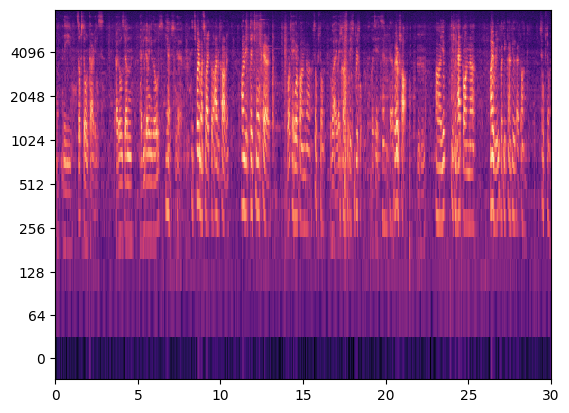

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S = librosa.feature.melspectrogram(
    y=waveform, sr=sample_rate, n_mels=128, fmax=8000
)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                            y_axis='log', sr=sample_rate,
                            ax=ax)
# remove axis labels
ax.set(xlabel=None, ylabel=None)
# remove axis
plt.savefig("images/2_cnns/mel.png")